**Keras**

tensorflow.keras....

1. Model
2. Kompilacja modelu
3. Fitowanie modelu
4. Testowanie modelu
5. Użycie modelu (klasyfikacja: predykcja, regresja: liczba)

In [1]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Dropout, MaxPooling2D, AveragePooling2D, Flatten, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist, cifar10

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**HYPERPARAMETERS**

In [2]:
epochS=5
batch=128
lr0=1e-3

**DANE**

In [3]:
#MNIST
(trainX, trainY), (testX, testY)= mnist.load_data()
trainX=trainX[...,None].astype("float32") /255.0
testX=testX[...,np.newaxis].astype("float32") /255.0

In [4]:
#trainX[1,1,1,]
#trainX.size
#trainX.ndim
shapeI=trainX.shape[1:4]

In [6]:
shapeI

(28, 28, 1)

In [8]:
#trainY.shape
trainY[3310]

9

In [9]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY=lb.transform(testY)

In [10]:
trainY[3210]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [11]:
#CIFAR10
(trainX, trainY), (testX, testY)= cifar10.load_data()
trainX=trainX.astype("float32") /255.0
testX=testX.astype("float32") /255.0

In [13]:
trainX.shape
#trainX[20,10,10,2]
#shapeI=trainX.shape[1:4]
#shapeI

(50000, 32, 32, 3)

In [14]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY=lb.transform(testY)
nazwy=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [15]:
testY[140]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

**Ad 1**

**A) API sekwencyjne**

In [16]:
shapeI=trainX.shape[1:4]
ile_klas=trainY.shape[1]  #ile_klas

#feature extraction
model=Sequential()
model.add(Input(shape=shapeI))
#model.add(Conv2D(32, (3,3), padding="same", input_shape=shapeI))
model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation('relu'))

#klasyfikator
model.add(Flatten())
model.add(Dense(ile_klas))
model.add(Activation('softmax'))  #sigmoid dla dwóch klas

**B) API funkcjonalne**

In [17]:
shapeI=trainX.shape[1:4]
ile_klas=trainY.shape[1]  #ile_klas

#feature extraction
x_wej=Input(shape=shapeI)

#wer 1
x=Conv2D(32, (3,3), padding="same")(x_wej)

#wer 2
x1=Conv2D(32, (3,3), padding="same")(x_wej)
x2=Conv2D(32, (5,5), padding="same")(x_wej)
x=concatenate([x1, x2])

x=Activation('relu')(x)

#klasyfikator
x=Flatten()(x)
x=Dense(ile_klas)(x)
x=Activation('softmax')(x)
model = Model(x_wej, x, name="MojModel")

**C) podklasa klasy Model**

In [18]:
shapeI=trainX.shape[1:4]
ile_klas=trainY.shape[1]  #ile_klas

class MojModel(Model):
    def __init__(self):
        super(MojModel, self).__init__()  #rodzic
        self.l1=Conv2D(32, (3,3), padding="same")
        self.l2=Activation('relu')
        self.l3=Flatten()
        self.l4=Dense(ile_klas)
        self.l5=Activation('softmax')
        
    #topologia sieci
    def call(self,x):
        x=self.l1(x)
        x=self.l2(x)
        x=self.l3(x)
        x=self.l4(x)
        x=self.l5(x)
        return x

model=MojModel()

**Ad 2**

loss:<br>
regresja: mean_squared_error<br>
klasifikacja binarna: binary_crossentropy<br>
klasyfikacja multi: categorical_crossentropy

optimizer:<br>
Adam<br>
SGD<br>
RMProp

In [19]:
opt=SGD(momentum=0.4, learning_rate=lr0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

**Ad 3**

In [20]:
#h1=model.fit(trainX, trainY, batch_size=batch, epochs=epochS)
#h2=model.fit(trainX, trainY, batch_size=batch, epochs=epochS)
h3=model.fit(trainX, trainY, batch_size=batch, epochs=epochS)

Epoch 1/5
391/391 [==============================] - 12s 17ms/step - loss: 2.1872 - accuracy: 0.2278
Epoch 2/5
391/391 [==============================] - 6s 17ms/step - loss: 1.9976 - accuracy: 0.3114
Epoch 3/5
391/391 [==============================] - 6s 17ms/step - loss: 1.9151 - accuracy: 0.3381
Epoch 4/5
391/391 [==============================] - 6s 17ms/step - loss: 1.8725 - accuracy: 0.3528
Epoch 5/5
391/391 [==============================] - 6s 17ms/step - loss: 1.8443 - accuracy: 0.3626


**Ad 4**

In [21]:
loss, accuracy = model.evaluate(testX, testY)

313/313 [==============================] - 2s 5ms/step - loss: 1.8308 - accuracy: 0.3684


**Ad 5**

In [22]:
predictions=model.predict(testX)

In [23]:
predictions.shape

(10000, 10)

In [24]:
predictions[90]

array([0.18485399, 0.13187458, 0.03613932, 0.02632575, 0.03278322,
       0.02991334, 0.00920847, 0.02804261, 0.26997375, 0.25088498],
      dtype=float32)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=nazwy))

              precision    recall  f1-score   support

    airplane       0.50      0.38      0.43      1000
  automobile       0.38      0.45      0.41      1000
        bird       0.27      0.23      0.25      1000
         cat       0.28      0.19      0.23      1000
        deer       0.43      0.15      0.22      1000
         dog       0.30      0.41      0.35      1000
        frog       0.35      0.54      0.42      1000
       horse       0.40      0.39      0.39      1000
        ship       0.42      0.49      0.45      1000
       truck       0.40      0.46      0.43      1000

    accuracy                           0.37     10000
   macro avg       0.37      0.37      0.36     10000
weighted avg       0.37      0.37      0.36     10000



In [25]:
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.use("PDF") #"AGG"=png, "PS"

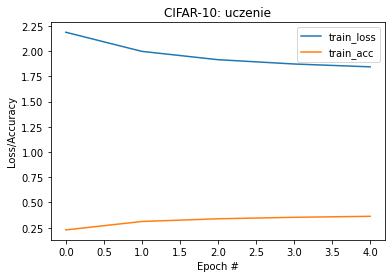

In [26]:
N = np.arange(0, epochS)
title="CIFAR-10: uczenie"
plt.figure()
plt.plot(N, h3.history["loss"], label="train_loss")
plt.plot(N, h3.history["accuracy"], label="train_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig("plik")
plt.show()